# Yolo classification

In [119]:
from ultralytics import YOLO
from glob import glob
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

In [2]:
model = YOLO('yolov8n-cls.pt')

In [121]:
os.chdir('./full_models')

# Train Fans

In [10]:
model.train(data='/Users/sayyedjilani/datasci210/full_dataset/fan_data', epochs=50,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/full_dataset/fan_data, epochs=50, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [4]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# train2 folder renamed to train
results_path = './runs/classify/train/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

epoch  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  val/loss  \
0       0     0.13181                0.84942                      1   0.46320   
1       1     0.04846                0.96396                      1   0.34786   
2       2     0.03109                0.96676                      1   0.34082   
3       3     0.02180                0.97877                      1   0.32966   
4       4     0.01467                0.98478                      1   0.32321   
5       5     0.01065                0.97958                      1   0.32547   
6       6     0.00846                0.99039                      1   0.31610   
7       7     0.00697                0.97597                      1   0.33022   
8       8     0.00620                0.98919                      1   0.31709   
9       9     0.00696                0.98759                      1   0.32019   
10     10     0.00445                0.98398                      1   0.32013   
11     11     0.00407                0.99039                      1   0.31697   
12     12     0.00510                0.98799                      1   0.31679   
13     13     0.00343                0.99039                      1   0.31565   
14     14     0.00278                0.99119                      1   0.31430   
15     15     0.00278                0.98959                      1   0.31477   
16     16     0.00285                0.99319                      1   0.31324   
17     17     0.00193                0.98959                      1   0.31557   
18     18     0.00155                0.98919                      1   0.31536   
19     19     0.00208                0.99199                      1   0.31295   
20     20     0.00138                0.99119                      1   0.31389   
21     21     0.00116                0.99159                      1   0.31398   
22     22     0.00151                0.99399                      1   0.31187   
23     23     0.00041                0.99199                      1   0.31307   
24     24     0.00014                0.99279                      1   0.31282   
25     25     0.00010                0.99239                      1   0.31276   
26     26     0.00004                0.99239                      1   0.31237   
27     27     0.00004                0.99319                      1   0.31224   
28     28     0.00004                0.99239                      1   0.31229   
29     29     0.00004                0.99439                      1   0.31152   
30     30     0.00003                0.99159                      1   0.31252   
31     31     0.00003                0.99319                      1   0.31208   
32     32     0.00002                0.99319                      1   0.31205   
33     33     0.00002                0.99279                      1   0.31216   
34     34     0.00002                0.99319                      1   0.31194   
35     35     0.00002                0.99279                      1   0.31222   
36     36     0.00002                0.99319                      1   0.31195   
37     37     0.00002                0.99239                      1   0.31217   
38     38     0.00002                0.99239                      1   0.31228   
39     39     0.00002                0.99239                      1   0.31236   
40     40     0.00002                0.99319                      1   0.31211   
41     41     0.00002                0.99359                      1   0.31197   
42     42     0.00001                0.99319                      1   0.31215   
43     43     0.00002                0.99359                      1   0.31196   
44     44     0.00002                0.99319                      1   0.31218   
45     45     0.00002                0.99319                      1   0.31220   
46     46     0.00003                0.99279                      1   0.31231   
47     47     0.00002                0.99359                      1   0.31186   
48     48     0.00006              

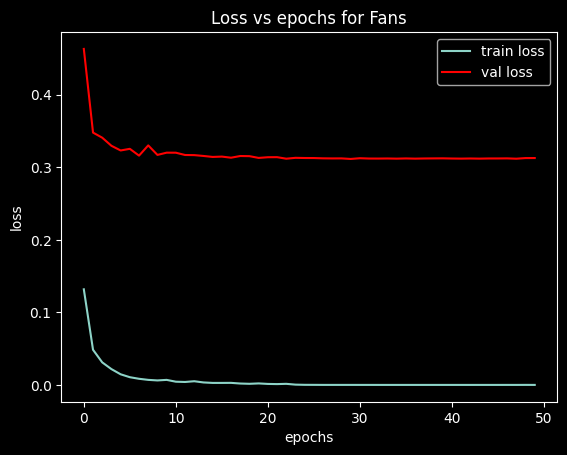

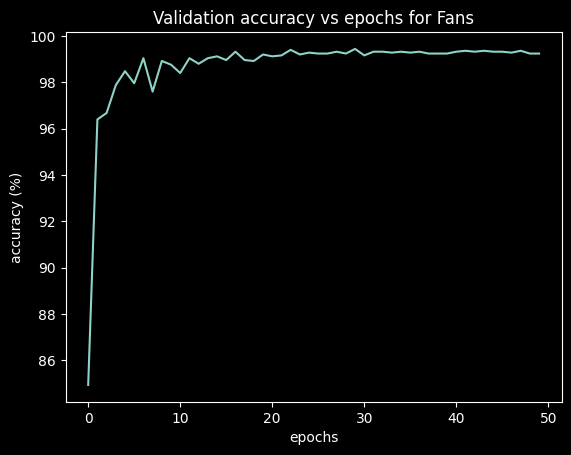

In [19]:
plt.figure()
plt.style.use('dark_background')
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Fans')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid(False)
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Fans')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.grid(False)
plt.show()

In [123]:
#predict on image

# load the model
fan_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train/weights/last.pt')
pred = fan_model('/Users/sayyedjilani/datasci210/full_dataset/fan_data/test/normal/10.png')

# Checking classes index assignment
print(pred[0].names)
print(pred[0].probs)
                 


image 1/1 /Users/sayyedjilani/datasci210/full_dataset/fan_data/test/normal/10.png: 224x224 normal 1.00, abnormal 0.00, 8.3ms
Speed: 0.4ms preprocess, 8.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
{0: 'abnormal', 1: 'normal'}
ultralytics.engine.results.Probs object with attributes:

data: tensor([1.0208e-08, 1.0000e+00])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(1.)
top5: [1, 0]
top5conf: tensor([1.0000e+00, 1.0208e-08])


In [124]:
print(fan_model.model)

ClassificationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv

In [47]:
# Paths
test_image_dir = '/Users/sayyedjilani/datasci210/full_dataset/fan_data/test/'
abnormal_dir = test_image_dir + 'abnormal/*.png'
normal_dir = test_image_dir + 'normal/*.png'


# 0 for abnormal and 1 for normal as per yolo tensor
true_labels = []
predictions = []
misclassified_images = []

true_pos = []
true_neg = []

# Predict on abnormal images
for img_path in glob(abnormal_dir):
    pred = fan_model(img_path,verbose=False)
    # Get the predicted class from index
    pred_class = np.argmax(pred[0].probs.data.numpy())  
    predictions.append(pred_class)
    true_labels.append(0)  # Abnormal
    if pred_class != 0:
        misclassified_images.append((img_path, 'abnormal', 'normal'))
    true_neg.append(img_path)

# Predict on normal images
for img_path in glob(normal_dir):
    pred = fan_model(img_path,verbose=False)
    pred_class = np.argmax(pred[0].probs.data.numpy())  
    predictions.append(pred_class)
    true_labels.append(1)  # Normal
    if pred_class != 1:
        misclassified_images.append((img_path, 'normal', 'abnormal'))
    true_pos.append(img_path)

# Calculate accuracy, precision, and recall
TP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 1))
FP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 0))
TN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 0))
FN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = (2*precision*recall)/(precision+recall)

print('Test evaulation metrics for Fans')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Test evaulation metrics for Fans
Accuracy: 0.9923908690428515
Precision: 0.9972602739726028
Recall: 0.9923664122137404
F1 Score: 0.9948073244055753


In [28]:
print('Fans:')
print(f"Number of misclassifications:  {len(misclassified_images)}")
print(f"Total number of images in test set: {len(glob(abnormal_dir)) + len(glob(normal_dir))}")

Fans:
Number of misclassifications:  19
Total number of images in test set: 2497


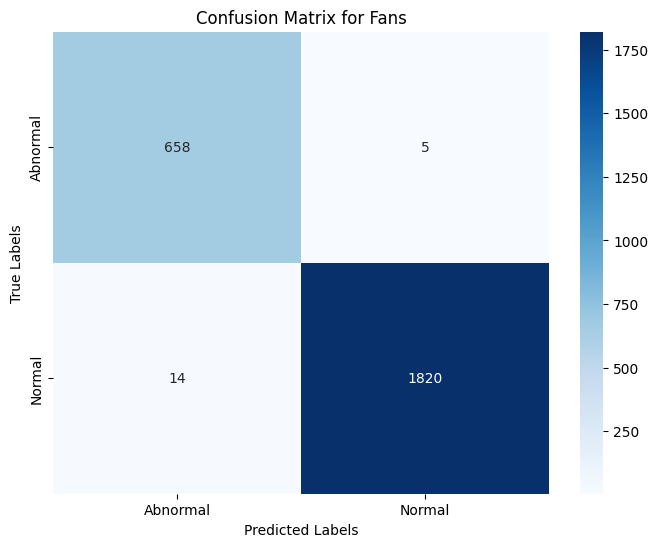

In [30]:
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Fans')
plt.show()


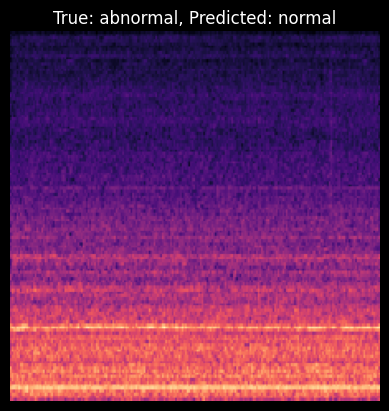

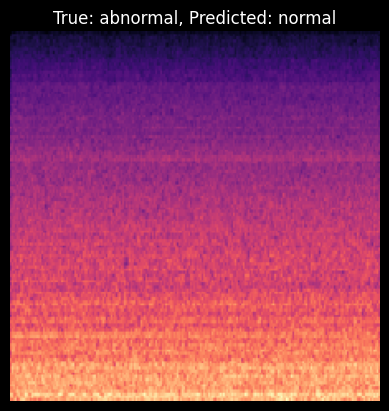

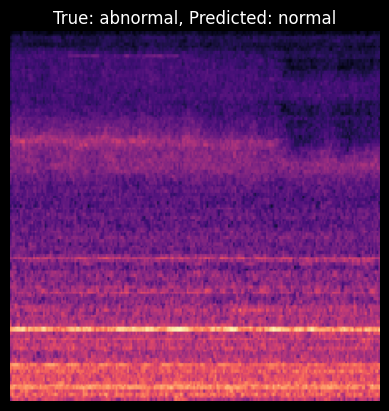

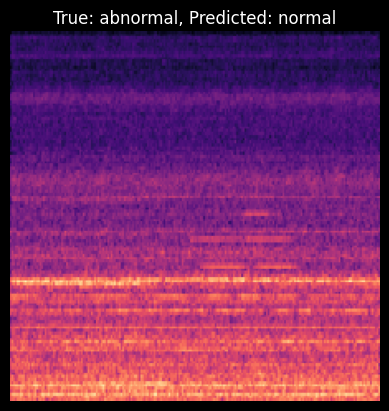

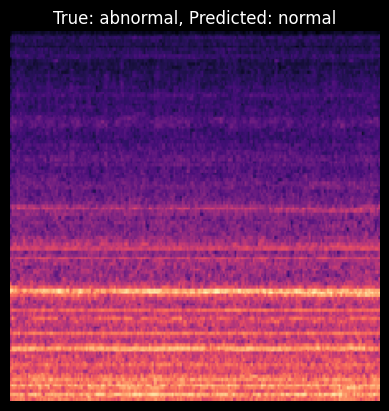

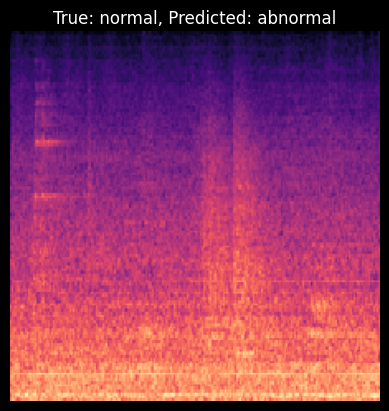

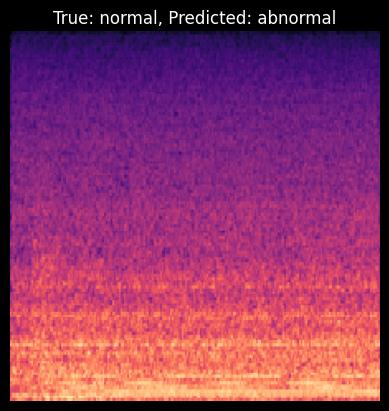

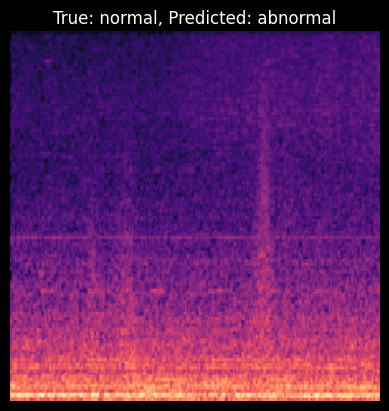

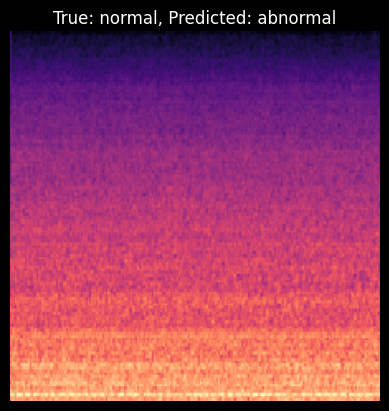

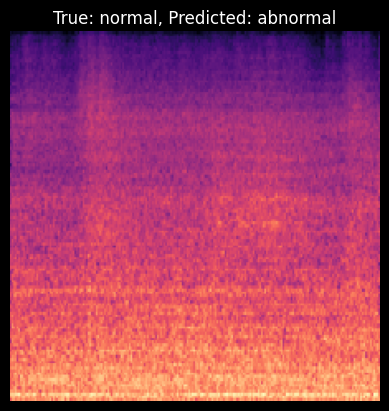

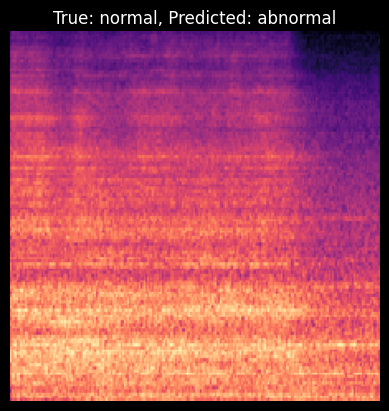

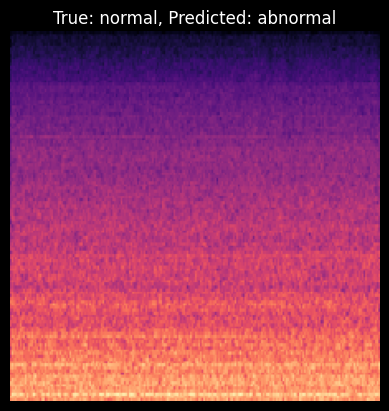

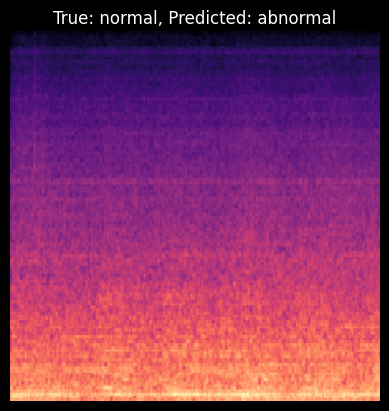

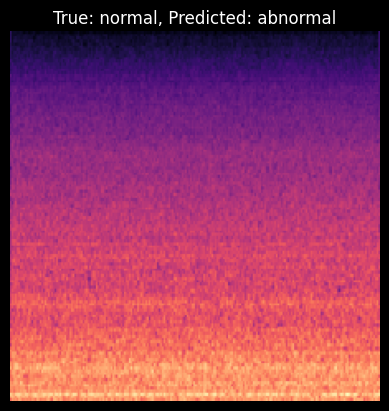

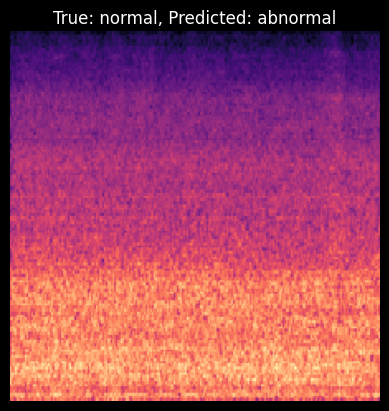

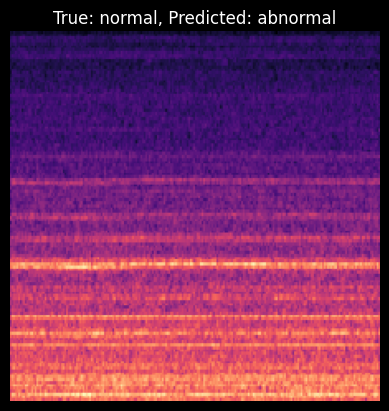

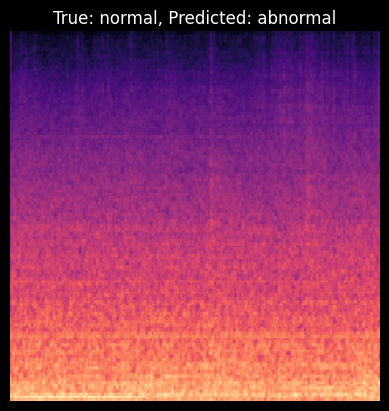

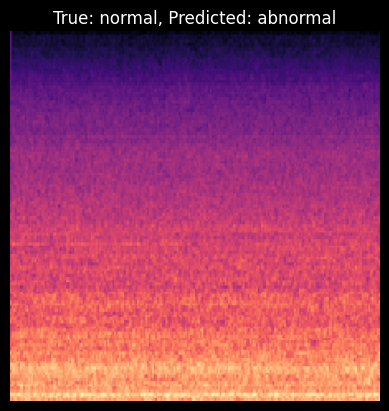

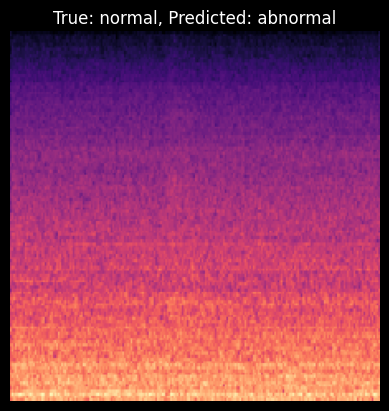

In [32]:
for img_path, true_label, pred_class in misclassified_images:
    img = cv2.imread(img_path)
    plt.style.use('dark_background')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img)
    plt.title(f'True: {true_label}, Predicted: {pred_class}')
    plt.axis('off')
    plt.show()

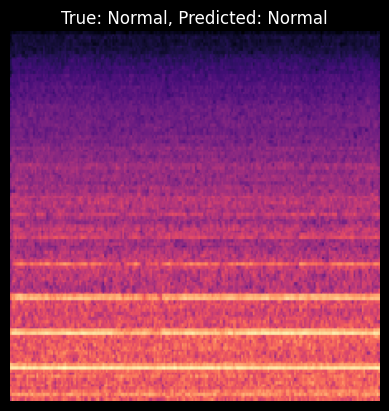

In [48]:
img = cv2.imread(true_pos[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Normal, Predicted: Normal')
plt.axis('off')
plt.show()

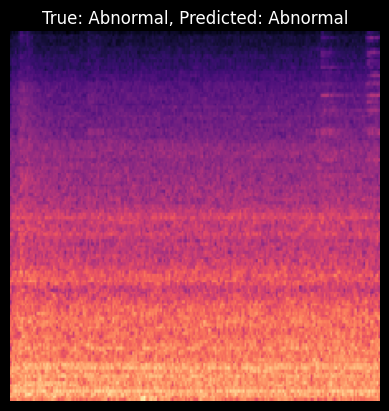

In [49]:
img = cv2.imread(true_neg[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Abnormal, Predicted: Abnormal')
plt.axis('off')
plt.show()

# Train pumps

In [15]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/full_dataset/pump_data', epochs=50,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/full_dataset/pump_data, epochs=50, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [16]:
results_path = './runs/classify/train2/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

epoch  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  val/loss  \
0       0     0.07879                0.89165                      1   0.41979   
1       1     0.04422                0.94820                      1   0.36477   
2       2     0.02424                0.93393                      1   0.37217   
3       3     0.01924                0.97727                      1   0.33387   
4       4     0.01404                0.98679                      1   0.32785   
5       5     0.00960                0.98150                      1   0.33040   
6       6     0.00729                0.98414                      1   0.32548   
7       7     0.00735                0.98520                      1   0.32430   
8       8     0.00479                0.98573                      1   0.32395   
9       9     0.00404                0.98679                      1   0.32093   
10     10     0.00258                0.99260                      1   0.31695   
11     11     0.00139                0.99049                      1   0.31776   
12     12     0.00129                0.98890                      1   0.32037   
13     13     0.00219                0.98784                      1   0.31995   
14     14     0.00160                0.99313                      1   0.31674   
15     15     0.00039                0.99366                      1   0.31575   
16     16     0.00036                0.98996                      1   0.31816   
17     17     0.00026                0.99313                      1   0.31537   
18     18     0.00015                0.99313                      1   0.31496   
19     19     0.00014                0.99313                      1   0.31487   
20     20     0.00006                0.99313                      1   0.31460   
21     21     0.00004                0.99419                      1   0.31433   
22     22     0.00003                0.99419                      1   0.31450   
23     23     0.00010                0.99471                      1   0.31431   
24     24     0.00003                0.99419                      1   0.31433   
25     25     0.00003                0.99419                      1   0.31423   
26     26     0.00004                0.99366                      1   0.31418   
27     27     0.00003                0.99471                      1   0.31408   
28     28     0.00002                0.99419                      1   0.31417   
29     29     0.00002                0.99419                      1   0.31415   
30     30     0.00002                0.99524                      1   0.31409   
31     31     0.00004                0.99419                      1   0.31429   
32     32     0.00002                0.99419                      1   0.31424   
33     33     0.00002                0.99419                      1   0.31400   
34     34     0.00004                0.99471                      1   0.31399   
35     35     0.00002                0.99313                      1   0.31415   
36     36     0.00002                0.99471                      1   0.31401   
37     37     0.00002                0.99419                      1   0.31405   
38     38     0.00005                0.99630                      1   0.31369   
39     39     0.00002                0.99419                      1   0.31375   
40     40     0.00003                0.99419                      1   0.31384   
41     41     0.00002                0.99419                      1   0.31405   
42     42     0.00002                0.99419                      1   0.31414   
43     43     0.00002                0.99419                      1   0.31409   
44     44     0.00003                0.99419                      1   0.31398   
45     45     0.00002                0.99419                      1   0.31401   
46     46     0.00002                0.99419                      1   0.31405   
47     47     0.00002                0.99419                      1   0.31408   
48     48     0.00002              

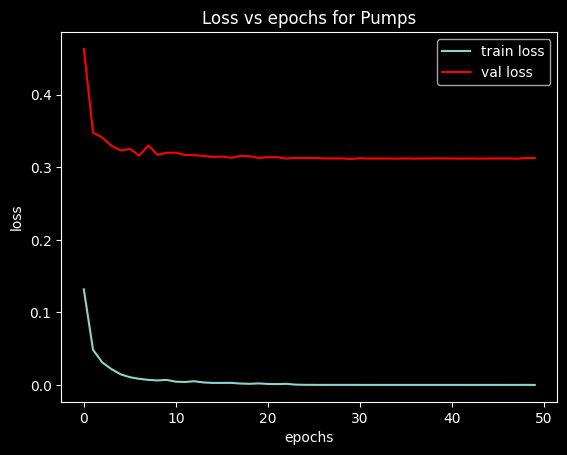

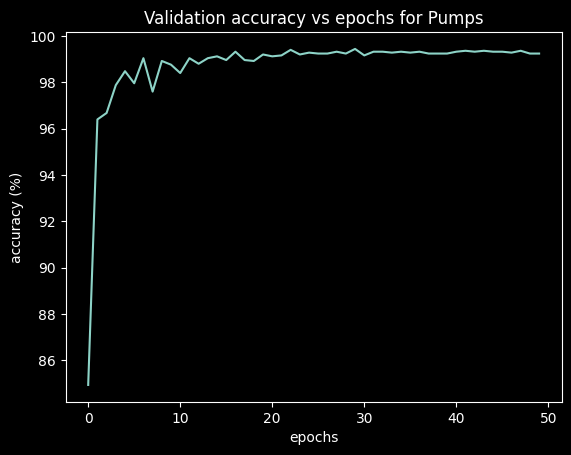

In [24]:
plt.figure()
plt.style.use('dark_background')
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Pumps')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid(False)
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Pumps')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.grid(False)

plt.show()

In [125]:
#predict on image

# load the model
pump_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train2/weights/last.pt')
pred = pump_model('/Users/sayyedjilani/datasci210/full_dataset/pump_data/test/normal/0.png')

# Checking classes index assignment
print(pred[0].names)
print(pred[0].probs)
                 


image 1/1 /Users/sayyedjilani/datasci210/full_dataset/pump_data/test/normal/0.png: 224x224 normal 1.00, abnormal 0.00, 7.8ms
Speed: 0.3ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
{0: 'abnormal', 1: 'normal'}
ultralytics.engine.results.Probs object with attributes:

data: tensor([2.0298e-09, 1.0000e+00])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(1.)
top5: [1, 0]
top5conf: tensor([1.0000e+00, 2.0298e-09])


In [126]:
print(pump_model.model)

ClassificationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv

In [51]:
# Paths
test_image_dir = '/Users/sayyedjilani/datasci210/full_dataset/pump_data/test/'
abnormal_dir = test_image_dir + 'abnormal/*.png'
normal_dir = test_image_dir + 'normal/*.png'


# 0 for abnormal and 1 for normal as per yolo tensor
true_labels = []
predictions = []
misclassified_images = []

true_pos = []
true_neg = []

# Predict on abnormal images
for img_path in glob(abnormal_dir):
    pred = pump_model(img_path,verbose=False)
    # Get the predicted class from index
    pred_class = np.argmax(pred[0].probs.data.numpy()) 
    predictions.append(pred_class)
    true_labels.append(0)  # Abnormal
    if pred_class != 0:
        misclassified_images.append((img_path, 'abnormal', 'normal'))
    true_neg.append(img_path)

# Predict on normal images
for img_path in glob(normal_dir):
    pred = pump_model(img_path,verbose=False)
    pred_class = np.argmax(pred[0].probs.data.numpy())  
    predictions.append(pred_class)
    true_labels.append(1)  # Normal
    if pred_class != 1:
        misclassified_images.append((img_path, 'normal', 'abnormal'))
    true_pos.append(img_path)

# Calculate accuracy, precision, and recall
TP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 1))
FP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 0))
TN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 0))
FN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = (2*precision*recall)/(precision+recall)

print('Test evaulation metrics for Pumps')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Test evaulation metrics for Pumps
Accuracy: 0.9941860465116279
Precision: 0.9941037735849056
Recall: 0.999407231772377
F1 Score: 0.9967484481229678


In [35]:
print('Pumps:')
print(f"Number of misclassifications:  {len(misclassified_images)}")
print(f"Total number of images in test set: {len(glob(abnormal_dir)) + len(glob(normal_dir))}")

Pumps:
Number of misclassifications:  11
Total number of images in test set: 1892


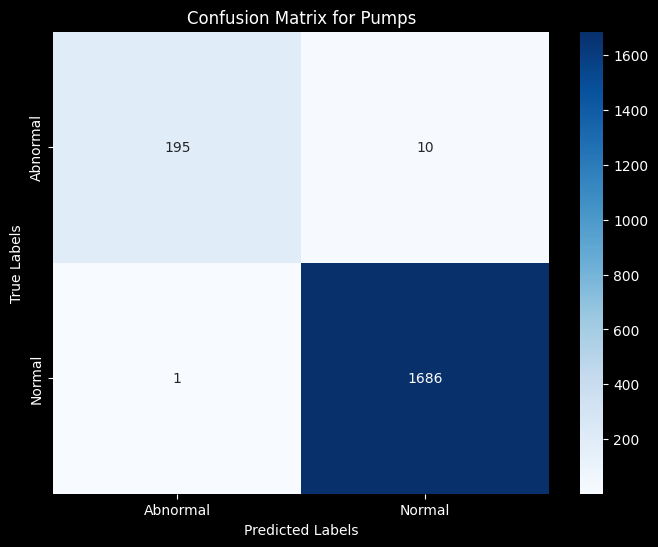

In [35]:
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Pumps')
plt.show()

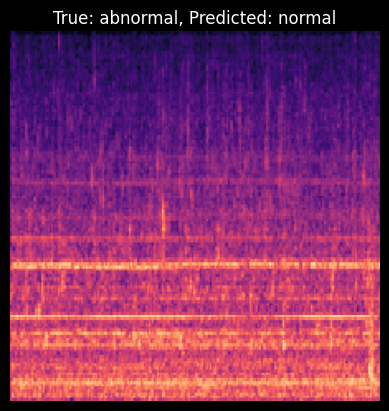

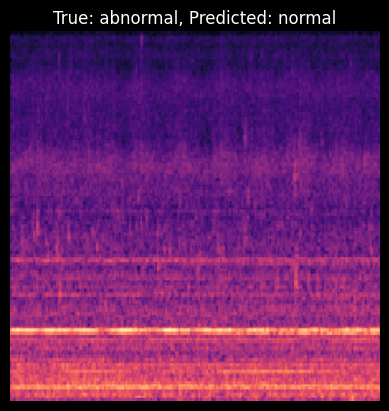

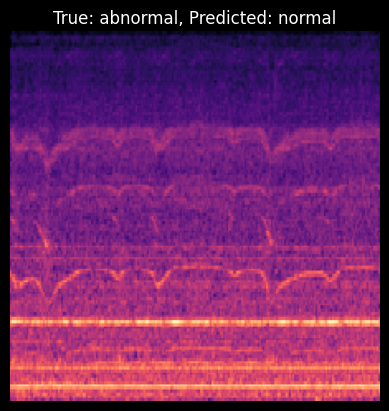

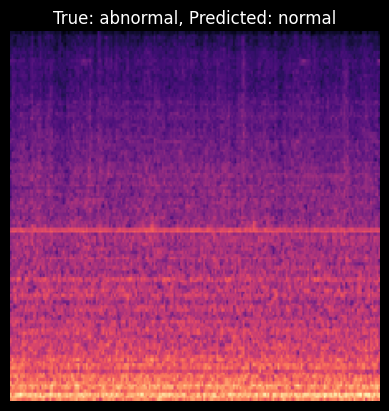

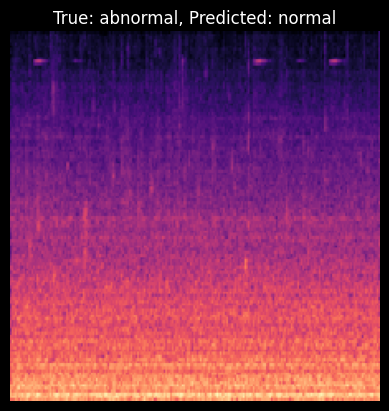

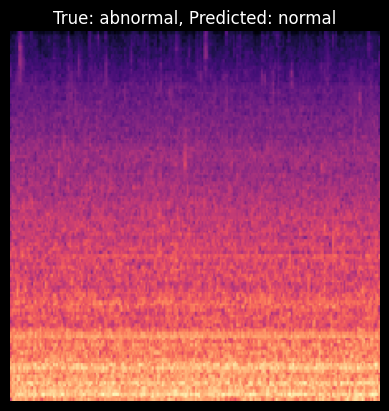

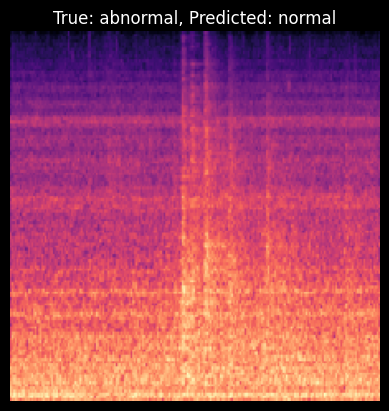

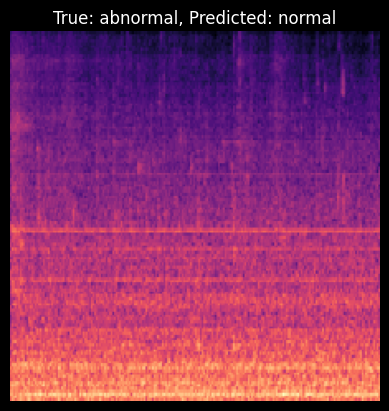

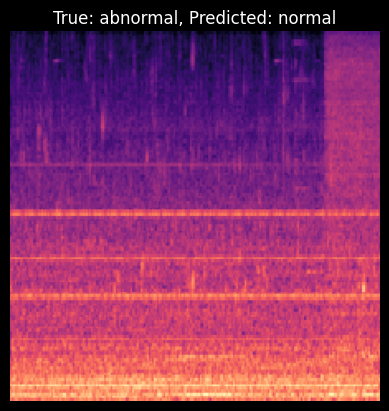

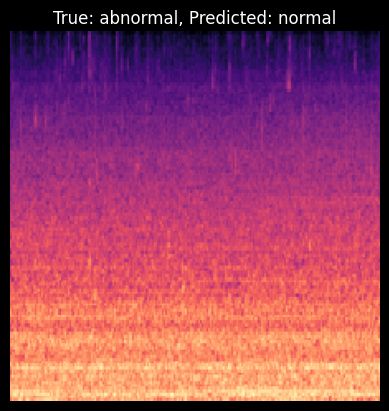

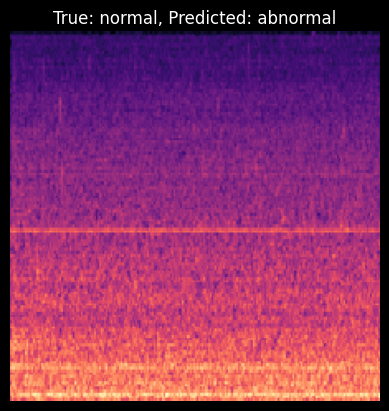

In [36]:
for img_path, true_label, pred_class in misclassified_images:
    plt.style.use('dark_background')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img)
    plt.title(f'True: {true_label}, Predicted: {pred_class}')
    plt.axis('off')
    plt.show()

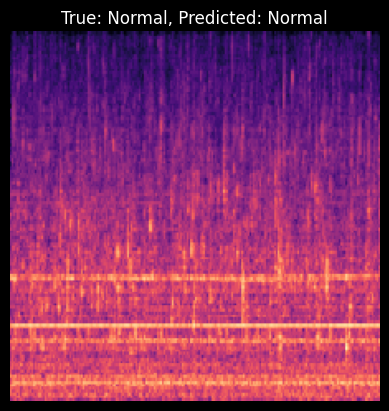

In [52]:
img = cv2.imread(true_pos[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Normal, Predicted: Normal')
plt.axis('off')
plt.show()

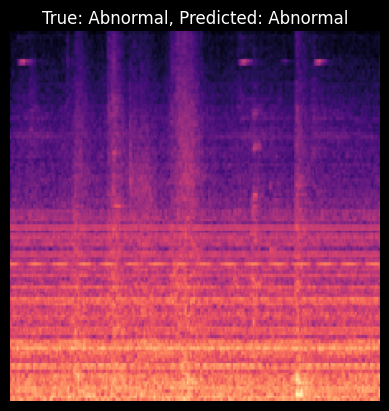

In [53]:
img = cv2.imread(true_neg[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Abnormal, Predicted: Abnormal')
plt.axis('off')
plt.show()

# Train Sliders

In [18]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/full_dataset/slider_data', epochs=50,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/full_dataset/slider_data, epochs=50, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [19]:
results_path = './runs/classify/train3/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

epoch  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  val/loss  \
0       0     0.10456                0.91748                      1   0.41192   
1       1     0.04409                0.96743                      1   0.35503   
2       2     0.02126                0.98751                      1   0.32570   
3       3     0.01103                0.99240                      1   0.31908   
4       4     0.00535                0.99783                      1   0.31379   
5       5     0.00194                0.99783                      1   0.31302   
6       6     0.00185                0.99783                      1   0.31375   
7       7     0.00177                0.99837                      1   0.31501   
8       8     0.00144                0.99674                      1   0.31403   
9       9     0.00108                0.99837                      1   0.31270   
10     10     0.00017                0.99891                      1   0.31228   
11     11     0.00006                0.99837                      1   0.31238   
12     12     0.00009                0.99783                      1   0.31261   
13     13     0.00005                0.99783                      1   0.31268   
14     14     0.00004                0.99783                      1   0.31271   
15     15     0.00003                0.99783                      1   0.31255   
16     16     0.00003                0.99783                      1   0.31258   
17     17     0.00002                0.99783                      1   0.31269   
18     18     0.00004                0.99783                      1   0.31245   
19     19     0.00004                0.99783                      1   0.31270   
20     20     0.00003                0.99783                      1   0.31258   
21     21     0.00002                0.99783                      1   0.31271   
22     22     0.00003                0.99783                      1   0.31246   
23     23     0.00003                0.99783                      1   0.31276   
24     24     0.00003                0.99783                      1   0.31259   
25     25     0.00002                0.99783                      1   0.31266   
26     26     0.00002                0.99783                      1   0.31251   
27     27     0.00003                0.99837                      1   0.31239   
28     28     0.00002                0.99783                      1   0.31270   
29     29     0.00002                0.99783                      1   0.31254   
30     30     0.00002                0.99783                      1   0.31265   
31     31     0.00002                0.99837                      1   0.31247   
32     32     0.00002                0.99837                      1   0.31251   
33     33     0.00002                0.99837                      1   0.31241   
34     34     0.00002                0.99783                      1   0.31297   
35     35     0.00002                0.99783                      1   0.31280   
36     36     0.00002                0.99783                      1   0.31282   
37     37     0.00002                0.99783                      1   0.31260   
38     38     0.00002                0.99783                      1   0.31260   
39     39     0.00002                0.99783                      1   0.31262   
40     40     0.00002                0.99783                      1   0.31268   
41     41     0.00002                0.99783                      1   0.31266   
42     42     0.00002                0.99783                      1   0.31264   
43     43     0.00018                0.99783                      1   0.31284   
44     44     0.00002                0.99783                      1   0.31284   
45     45     0.00002                0.99783                      1   0.31277   
46     46     0.00002                0.99783                      1   0.31274   
47     47     0.00002                0.99783                      1   0.31274   
48     48     0.00002              

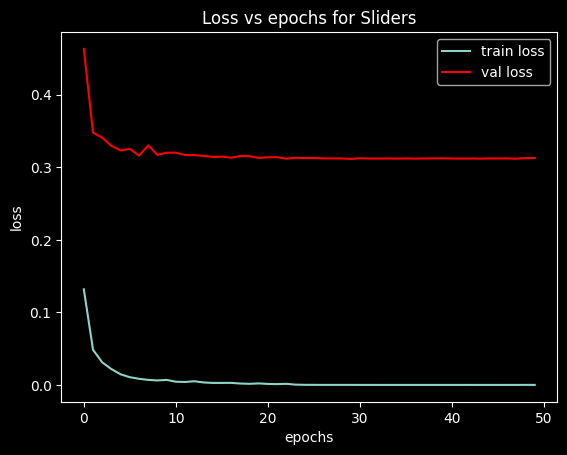

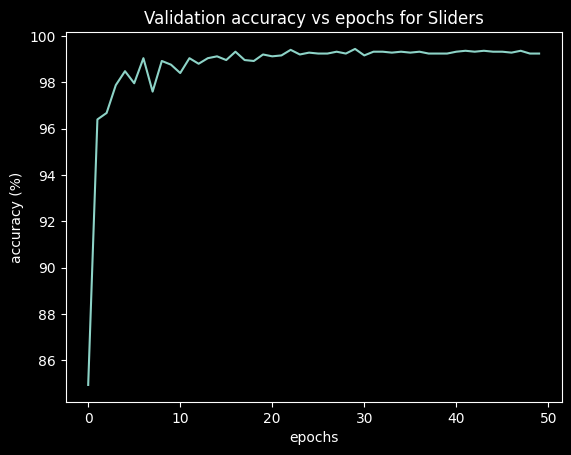

In [26]:
plt.figure()
plt.style.use('dark_background')
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Sliders')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid(False)
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Sliders')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.grid(False)

plt.show()

In [127]:
#predict on image

# load the model
slider_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train3/weights/last.pt')
pred = slider_model('/Users/sayyedjilani/datasci210/full_dataset/slider_data/test/normal/1.png')

# Checking classes index assignment
print(pred[0].names)
print(pred[0].probs)
                 


image 1/1 /Users/sayyedjilani/datasci210/full_dataset/slider_data/test/normal/1.png: 224x224 normal 1.00, abnormal 0.00, 11.8ms
Speed: 0.4ms preprocess, 11.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
{0: 'abnormal', 1: 'normal'}
ultralytics.engine.results.Probs object with attributes:

data: tensor([8.5808e-06, 9.9999e-01])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(1.0000)
top5: [1, 0]
top5conf: tensor([9.9999e-01, 8.5808e-06])


In [128]:
print(slider_model.model)

ClassificationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv

In [55]:
# Paths
test_image_dir = '/Users/sayyedjilani/datasci210/full_dataset/slider_data/test/'
abnormal_dir = test_image_dir + 'abnormal/*.png'
normal_dir = test_image_dir + 'normal/*.png'


# 0 for abnormal and 1 for normal as per yolo tensor
true_labels = []
predictions = []
misclassified_images = []

true_pos = []
true_neg = []

# Predict on abnormal images
for img_path in glob(abnormal_dir):
    pred = slider_model(img_path,verbose=False)
    # Get the predicted class from index
    pred_class = np.argmax(pred[0].probs.data.numpy())  
    predictions.append(pred_class)
    true_labels.append(0)  # Abnormal
    if pred_class != 0:
        misclassified_images.append((img_path, 'abnormal', 'normal'))
    true_neg.append(img_path)

# Predict on normal images
for img_path in glob(normal_dir):
    pred = slider_model(img_path,verbose=False)
    pred_class = np.argmax(pred[0].probs.data.numpy()) 
    predictions.append(pred_class)
    true_labels.append(1)  # Normal
    if pred_class != 1:
        misclassified_images.append((img_path, 'normal', 'abnormal'))
    true_pos.append(img_path)

# Calculate accuracy, precision, and recall
TP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 1))
FP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 0))
TN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 0))
FN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = (2*precision*recall)/(precision+recall)

print('Test evaulation metrics for Sliders')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Test evaulation metrics for Sliders
Accuracy: 0.997828447339848
Precision: 0.9972337482710927
Recall: 1.0
F1 Score: 0.9986149584487535


In [39]:
print('Sliders:')
print(f"Number of misclassifications:  {len(misclassified_images)}")
print(f"Total number of images in test set: {len(glob(abnormal_dir)) + len(glob(normal_dir))}")

Sliders:
Number of misclassifications:  4
Total number of images in test set: 1842


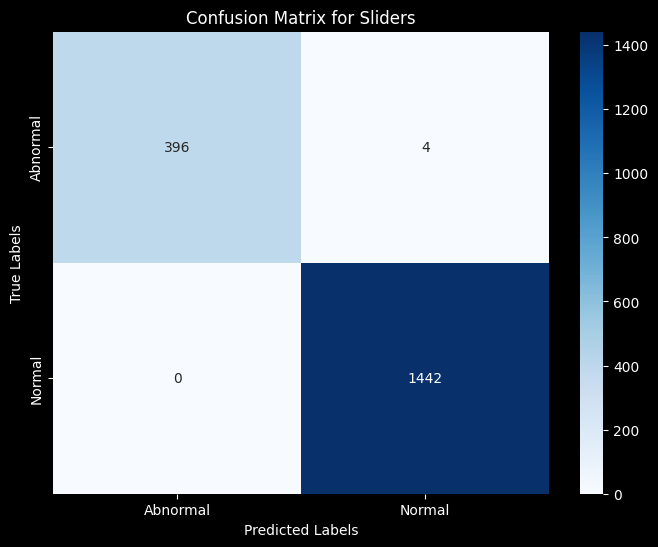

In [40]:
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Sliders')
plt.show()

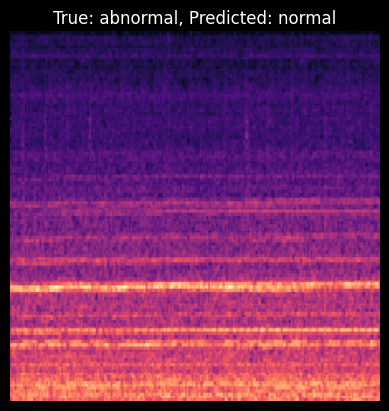

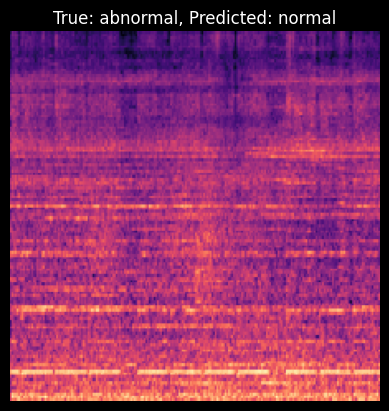

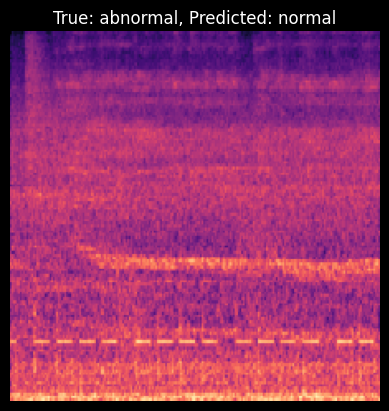

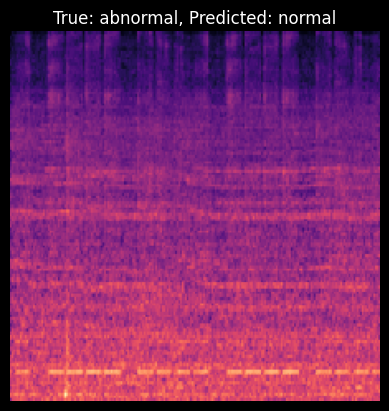

In [41]:
for img_path, true_label, pred_class in misclassified_images:
    plt.style.use('dark_background')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img)
    plt.title(f'True: {true_label}, Predicted: {pred_class}')
    plt.axis('off')
    plt.show()

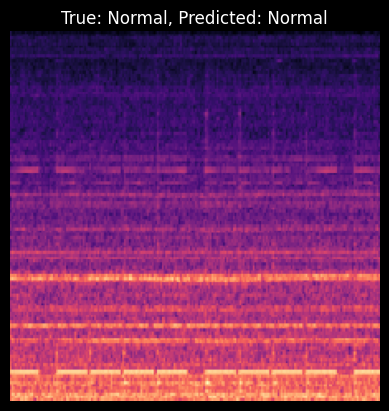

In [57]:
img = cv2.imread(true_pos[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Normal, Predicted: Normal')
plt.axis('off')
plt.show()

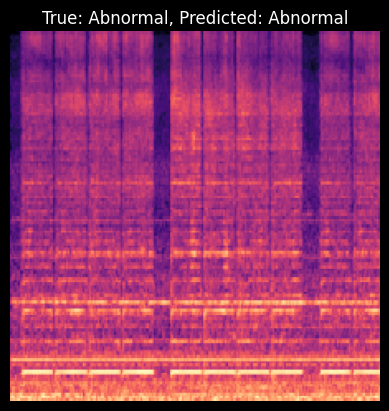

In [56]:
img = cv2.imread(true_neg[0])
plt.style.use('dark_background')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.title(f'True: Abnormal, Predicted: Abnormal')
plt.axis('off')
plt.show()

# Train Valves

In [21]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/full_dataset/valve_data', epochs=50,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/full_dataset/valve_data, epochs=50, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, r

In [22]:
results_path = './runs/classify/train4/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

epoch  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  val/loss  \
0       0     0.09028                0.88539                      1   0.45468   
1       1     0.08673                0.88539                      1   0.42193   
2       2     0.04394                0.98721                      1   0.32884   
3       3     0.00789                0.99414                      1   0.31499   
4       4     0.00366                0.99680                      1   0.31095   
5       5     0.00290                0.99787                      1   0.30899   
6       6     0.00145                0.99840                      1   0.30823   
7       7     0.00060                0.99947                      1   0.30671   
8       8     0.00014                0.99947                      1   0.30669   
9       9     0.00019                0.99840                      1   0.30733   
10     10     0.00034                1.00000                      1   0.30632   
11     11     0.00014                1.00000                      1   0.30666   
12     12     0.00068                0.99733                      1   0.30806   
13     13     0.00070                0.99840                      1   0.30779   
14     14     0.00015                1.00000                      1   0.30622   
15     15     0.00004                1.00000                      1   0.30627   
16     16     0.00004                1.00000                      1   0.30616   
17     17     0.00002                1.00000                      1   0.30614   
18     18     0.00002                1.00000                      1   0.30613   
19     19     0.00002                1.00000                      1   0.30613   
20     20     0.00002                1.00000                      1   0.30613   
21     21     0.00001                1.00000                      1   0.30612   
22     22     0.00002                1.00000                      1   0.30614   
23     23     0.00001                1.00000                      1   0.30612   
24     24     0.00001                1.00000                      1   0.30612   
25     25     0.00001                1.00000                      1   0.30613   
26     26     0.00001                1.00000                      1   0.30613   
27     27     0.00001                1.00000                      1   0.30612   
28     28     0.00001                1.00000                      1   0.30612   
29     29     0.00001                1.00000                      1   0.30612   
30     30     0.00001                1.00000                      1   0.30613   
31     31     0.00001                1.00000                      1   0.30613   
32     32     0.00001                1.00000                      1   0.30612   
33     33     0.00001                1.00000                      1   0.30612   
34     34     0.00001                1.00000                      1   0.30612   
35     35     0.00002                1.00000                      1   0.30613   
36     36     0.00001                1.00000                      1   0.30613   
37     37     0.00001                1.00000                      1   0.30613   
38     38     0.00001                1.00000                      1   0.30613   
39     39     0.00001                1.00000                      1   0.30613   
40     40     0.00001                1.00000                      1   0.30614   
41     41     0.00001                1.00000                      1   0.30613   
42     42     0.00001                1.00000                      1   0.30613   
43     43     0.00001                1.00000                      1   0.30613   
44     44     0.00001                1.00000                      1   0.30613   
45     45     0.00001                1.00000                      1   0.30613   
46     46     0.00001                1.00000                      1   0.30613   
47     47     0.00001                1.00000                      1   0.30613   
48     48     0.00001              

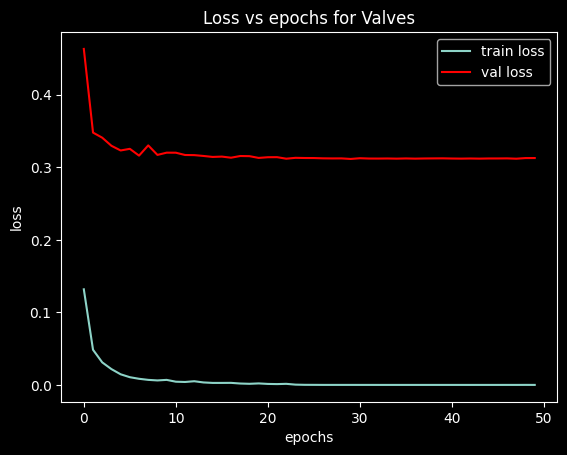

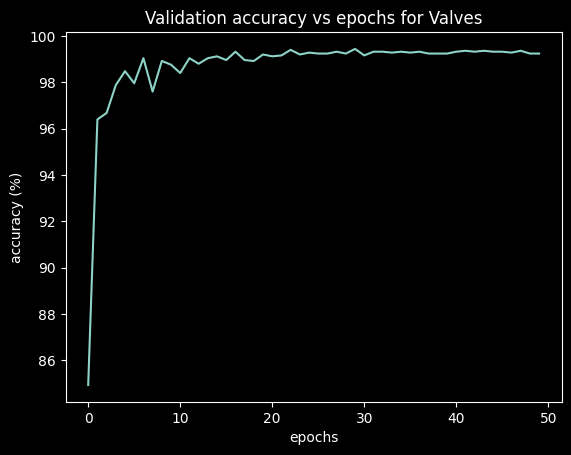

In [27]:
plt.figure()
plt.style.use('dark_background')
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Valves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.grid(False)


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Valves')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.grid(False)

plt.show()

In [129]:
#predict on image

# load the model
valve_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train4/weights/last.pt')
pred = valve_model('/Users/sayyedjilani/datasci210/full_dataset/valve_data/test/normal/0.png')

# Checking classes index assignment
print(pred[0].names)
print(pred[0].probs)


image 1/1 /Users/sayyedjilani/datasci210/full_dataset/valve_data/test/normal/0.png: 224x224 normal 1.00, abnormal 0.00, 6.9ms
Speed: 0.5ms preprocess, 6.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
{0: 'abnormal', 1: 'normal'}
ultralytics.engine.results.Probs object with attributes:

data: tensor([2.2037e-05, 9.9998e-01])
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(1.0000)
top5: [1, 0]
top5conf: tensor([9.9998e-01, 2.2037e-05])


In [130]:
print(valve_model.model)

ClassificationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv

In [43]:
# Paths
test_image_dir = '/Users/sayyedjilani/datasci210/full_dataset/valve_data/test/'
abnormal_dir = test_image_dir + 'abnormal/*.png'
normal_dir = test_image_dir + 'normal/*.png'


# 0 for abnormal and 1 for normal as per yolo tensor
true_labels = []
predictions = []
misclassified_images = []

# Predict on abnormal images
for img_path in glob(abnormal_dir):
    pred = valve_model(img_path,verbose=False)
    # Get the predicted class from index
    pred_class = np.argmax(pred[0].probs.data.numpy())  
    predictions.append(pred_class)
    true_labels.append(0)  # Abnormal
    if pred_class != 0:
        misclassified_images.append((img_path, 'abnormal', 'normal'))

# Predict on normal images
for img_path in glob(normal_dir):
    pred = valve_model(img_path,verbose=False)
    pred_class = np.argmax(pred[0].probs.data.numpy()) 
    predictions.append(pred_class)
    true_labels.append(1)  # Normal
    if pred_class != 1:
        misclassified_images.append((img_path, 'normal', 'abnormal'))

# Calculate accuracy, precision, and recall
TP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 1))
FP = sum((np.array(predictions) == 1) & (np.array(true_labels) == 0))
TN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 0))
FN = sum((np.array(predictions) == 0) & (np.array(true_labels) == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = (2*precision*recall)/(precision+recall)

print('Test evaulation metrics for Valves')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Test evaulation metrics for Valves
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [42]:
print('Valves:')
print(f"Number of misclassifications:  {len(misclassified_images)}")
print(f"Total number of images in test set: {len(glob(abnormal_dir)) + len(glob(normal_dir))}")

Valves:
Number of misclassifications:  0
Total number of images in test set: 1876


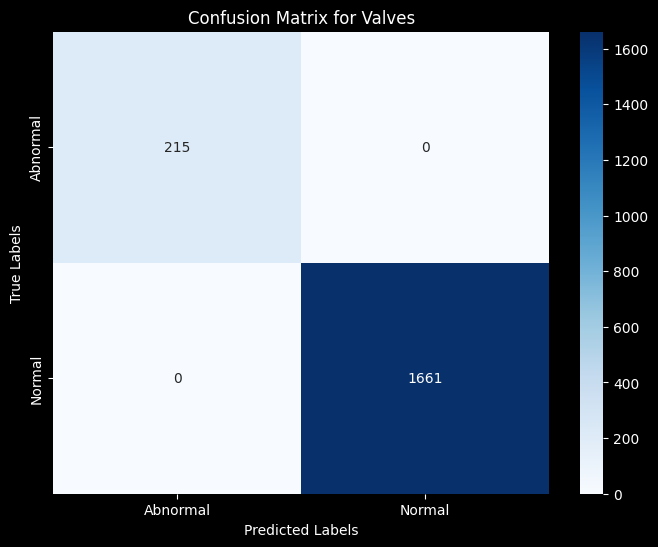

In [43]:
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Valves')
plt.show()